In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import PIL.Image as pilimg

In [2]:
# 분할표 검정(test using contingency tables)
# 카이제곱 독립성 검정을 위해 자료가 표형태로 정열되어을 때 이 표를 분할표라고 한다.

# 독립성 검정(test for independence) - 카이제곱 검정
# 두 변수 사이의 독립성을 검정하는 것이다.
# ex) 귀무가설 H0 : 새로운 처리기법에 대한 선호도는 그룹과는 상관이 없다.
#     대립가설 H1 : 새로운 처리기법에 대한 선호도는 그룹에 따라 다르다.

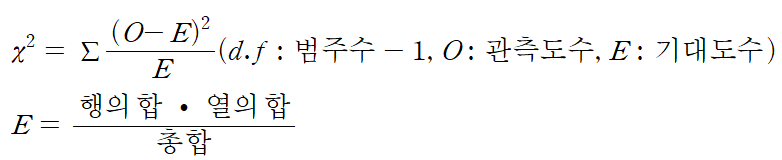

In [3]:
formula = pilimg.open("C:\\Users\\Msi\\Desktop\\통계 프로그래밍 연습\\분할표 검정 공식.png")
formula

In [4]:
data = {"new" : [100, 50], "old" : [80, 120], "not all" : [20, 30]}
index = ["nurse", "doctor"]
df = pd.DataFrame(data, index = index)

data = {"high" : [15, 8, 6], "universe" : [12, 15, 8], "graduate" : [8, 9, 7]}
index = ["urban", "suburb", "countryside"]
df2 = pd.DataFrame(data, index = index)

In [5]:
def chi_square_cv(df, alpha, side_type):
    degree_freedom = (np.shape(df)[0] - 1)*(np.shape(df)[1] - 1)
    
    row_sum = [sum(df.iloc[i,:]) for i in range(np.shape(df)[0])]
    col_sum = [sum(df.iloc[:,i]) for i in range(np.shape(df)[1])]

    X_square = 0
    for  i in range(len(row_sum)):
        for j in range(len(col_sum)):
            df_E = (row_sum[i]*col_sum[j]) / sum(row_sum)
            X_square = X_square + (math.pow(df.iloc[i, j] - df_E, 2) / df_E)
            
    if side_type == 'left':
        cv = st.chi2.ppf(alpha, degree_freedom)
        if X_square <= cv:
            print("검정값 {:.3f}이 임계값은 {:.3f} 안에 포함되기 때문에 귀무가설을 기각한다.".format(X_square, cv))
        else:
            print("검정값 {:.3f}이 임계값은 {:.3f} 밖에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv))
    elif side_type == 'right':
        cv = st.chi2.ppf(1-alpha, degree_freedom)
        if cv <= X_square:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 귀무가설을 기각한다.".format(X_square, cv))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f} 밖에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv))
    elif side_type == 'both':
        cv_left = st.chi2.ppf(alpha/2, degree_freedom)
        cv_right = st.chi2.ppf(1-(alpha/2), degree_freedom)
        if X_square <= cv_left:
            print("검정값 {:.3f}이 임계값은 {:.3f} 안에 포함되기 때문에 때문에 귀무가설을 기각한다.".format(X_square, cv_left))
        elif cv_right <= X_square:
            print("검정값 {:.3f}이 임계값은 {:.3f} 안에 포함되기 때문에 때문에 귀무가설을 기각한다.".format(X_square, cv_right))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f}와 임계값 {:.3f} 사이에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv_left, cv_right))
    else:
        print("side_type을 left, right, both 중에 골라주세요.")

In [6]:
chi_square_cv(df, 0.05, 'right')

검정값 26.667이 임계값 5.991 안에 포함되기 때문에 귀무가설을 기각한다.


In [7]:
chi_square_cv(df2, 0.05, 'right')

검정값 3.006이 임계값 9.488 밖에 있기 때문에 귀무가설을 기각하지 않는다.
